In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import jieba
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
##设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

In [ ]:
# 文本清洗函数
def clean_text(text):
    text = re.sub(r'[^\u4e00-\u9fa5]', ' ', text)  
    return text.strip()

In [ ]:
# 加载停用词
def load_stopwords(stopwords_path):
    stopwords = [i.strip() for i in open(stopwords_path, encoding='UTF-8').readlines()]
    new_stop_words = ['研究', '方法', '理论', '基础', '方法论', '分析', '评价', '探讨', '能力', '基于', '影响', '因素', '模型', '我国', '中国', '北京', '意愿', '统计', '数据', '为例', '实证', '一点', '一种', '世界', '中国', '事件', '事情', '人民', '代表', '价值']
    stopwords.extend(new_stop_words)
    return set(stopwords)

In [ ]:
# 分词并去除停用词
def segment_and_remove_stopwords(text, stopwords):
    words = jieba.cut(text)
    return ' '.join(word for word in words if word not in stopwords)

In [ ]:
# TF-IDF转换函数
def tfidf_transform(texts, stopwords):
    tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words=list(stopwords))
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    return tfidf_matrix, tfidf_vectorizer.get_feature_names_out()


# 创建字典和语料库
def create_corpus(texts):
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    return dictionary, corpus

# LDA模型
def lda_model(corpus, dictionary, num_topics=5):
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    return model

# 生成词云图
def generate_wordcloud(topic_words, title):
    wc = WordCloud(background_color='white', width=800, height=600)
    wc.generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


Year: 2011, Sample Cleaned Text: 0                   兰考   大骗子   程军锋   诈骗   罪行   调查   实录
1       九月   二十八日   郑州   见到   受害人   讲述   程军锋   罪恶   记录
2    程军锋   诈骗     一人   团伙         诈骗   农民   钱财     ...
3    程军锋   大骗子         冒充   国家   人员   招摇撞骗   罪     ...
4    骗收   农民   钱   农民       解决       受害   农民   不日  ...
Name: cleaned_text, dtype: object

TF-IDF Top Words:
一条, 一篇, 七宗罪, 事实, 事故, 仿制, 企业, 伤害, 体制, 全球, 
公众, 公共, 公开, 公知, 公知们, 内容, 军团, 利益, 制度, 南方, 
南方周末, 历史, 反抗, 发展, 发生, 发表, 只能, 吴法天, 国家, 地方, 
声音, 媒体, 孔庆东, 官员, 市场, 希望, 强奸, 很多, 微博, 微博上, 
懦弱, 批评, 报系, 报道, 改变, 改革, 攻击, 政府, 政治, 教授, 
文化, 文章, 文革, 新闻, 方舟子, 日本, 时代, 普世, 朋友, 权力, 
毛泽东, 民主, 汉奸, 法院, 特别, 生活, 生物, 电影, 知识分子, 社会, 
社会主义, 秀秀, 程军锋, 系统, 红河, 经济, 网友, 网民, 网站, 网络, 
美国, 群众, 老金, 腾讯, 自由, 舆论, 药物, 表达, 西方, 评论, 
诈骗, 这是, 道德, 都市报, 革命, 韩寒, 领域, 领导, 领袖, 骗子, 


[(0,
  [('南方', 0.009066879),
   ('系', 0.005224132),
   ('自由', 0.004718554),
   ('教授', 0.004070621),
   ('社会', 0.0033287231),
   ('公知', 0.0029441386),
   ('毛泽东', 0.0027011058),
   ('这是', 0.0026685647),
   ('知识分子', 0.002424542),
   ('月', 0.0022504684)]),
 (1,
  [('社会', 0.0050261985),
   ('美国', 0.0043330253),
   ('国家', 0.0041493746),
   ('吴法天', 0.0040808776),
   ('孔庆东', 0.0030627158),
   ('知识分子', 0.0028581498),
   ('民主', 0.0026347153),
   ('网友', 0.0026106115),
   ('媒体', 0.0025857105),
   ('程军锋', 0.0025599825)]),
 (2,
  [('微博', 0.0036963378),
   ('媒体', 0.0030331719),
   ('公共', 0.0029734462),
   ('社会', 0.0028614698),
   ('公知们', 0.0027628618),
   ('南方', 0.0026739852),
   ('汉奸', 0.0026316738),
   ('南方周末', 0.0025395823),
   ('日本', 0.002405097),
   ('公开', 0.0023932843)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

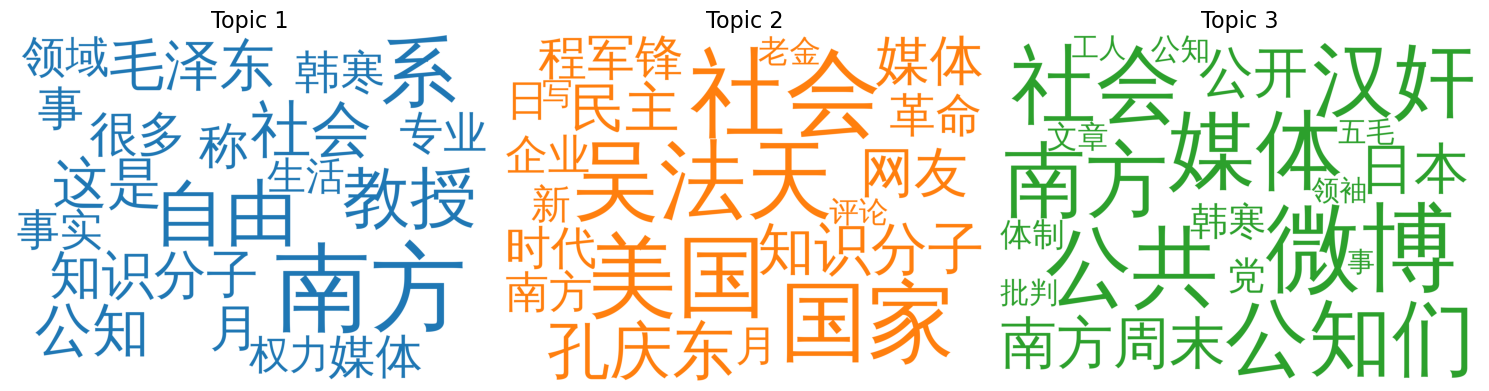


Year: 2012, Sample Cleaned Text: 0                             背叛   公知   韩寒   负面新闻   缠身
1      目前为止   麦田   质疑   韩寒   代笔     始作俑者   舆论   热炒 ...
2    麦田   质疑   韩寒   代笔     持续   升级   麦田     公开   道歉...
3    韩寒   文字   限于   三峡   大坝   一篇   感觉   文字水平   不过如此...
4             到此为止   只持   公知   韩寒       负面新闻   一文   观点
Name: cleaned_text, dtype: object

TF-IDF Top Words:
三个, 两个, 人口, 体制, 作家, 公众, 公共, 公民, 公知, 公知们, 
关注, 养老, 凤凰网, 利益, 制度, 加藤, 北大, 历史, 原因, 发展, 
发现, 发生, 发表, 只能, 吴法天, 周燕, 国家, 地方, 复兴, 媒体, 
孩子, 宪政, 宪法, 导致, 市场, 希望, 建立, 很多, 微博, 思想, 
情况, 意见, 成功, 批判, 批评, 投资, 接受, 控制, 改革, 政府, 
政治, 政策, 故事, 教授, 教育, 文化, 文学, 文章, 方式, 方舟子, 
日本, 时代, 有人, 未来, 朱大可, 权力, 毛泽东, 民主, 民众, 民族, 
民间, 水平, 法律, 现实, 理性, 生活, 知识分子, 社会, 税政, 精神, 
经济, 网友, 网络, 美国, 自由, 舆论, 莫言, 西方, 观点, 质疑, 
这是, 逻辑, 道德, 错误, 面对, 革命, 韩寒, 领导, 饿死, 麦田, 


[(0,
  [('历史', 0.0065651564),
   ('美国', 0.006043876),
   ('中共', 0.005422017),
   ('河南', 0.004823965),
   ('汤恩伯', 0.004280721),
   ('凤凰网', 0.0041915355),
   ('毛泽东', 0.003632691),
   ('制度', 0.003522483),
   ('这是', 0.003390112),
   ('饿死', 0.0030441678)]),
 (1,
  [('莫言', 0.01596),
   ('政治', 0.006846548),
   ('文学', 0.0056053433),
   ('国家', 0.0047012977),
   ('宪政', 0.004069473),
   ('社会', 0.0034809723),
   ('作家', 0.0033430976),
   ('网络', 0.00328972),
   ('经济', 0.0031700372),
   ('政府', 0.0030687193)]),
 (2,
  [('月', 0.0051186164),
   ('文化', 0.0045639197),
   ('日', 0.0045006364),
   ('国家', 0.0038689966),
   ('莫言', 0.0036062496),
   ('公知', 0.0030894333),
   ('美国', 0.0026603504),
   ('三个', 0.002548188),
   ('朱大可', 0.0025463786),
   ('汤', 0.0024481171)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

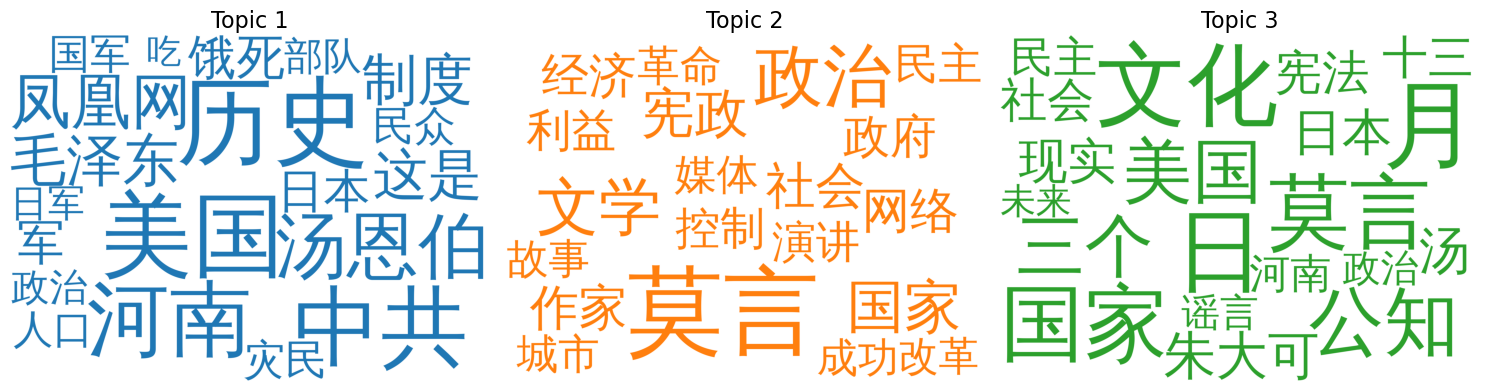


Year: 2013, Sample Cleaned Text: 0                                    公知   性质   极端   自私
1    钓鱼岛     看清   公知们   嘴脸   公知们   爱国   等于   爱   政府...
2       岁   小孩   改朝换代   脚下   这块   土地     领土     永远   回
3    公知们   国家   领土     态度   可知   公知   关心   讨   糖   ...
4                                                   苍蝇
Name: cleaned_text, dtype: object

TF-IDF Top Words:
一年, 东西, 两个, 事实, 人口, 人均, 体制, 俄罗斯, 信息, 公开, 
公知, 公知们, 共产党, 关系, 军队, 利益, 制度, 制造, 历史, 原因, 
反对, 发展, 发现, 发生, 发表, 只能, 台湾, 同性恋, 告诉, 国内, 
国家, 地位, 奶粉, 媒体, 孩子, 官员, 导致, 崩溃, 工作, 市场, 
希望, 带来, 强大, 当年, 很多, 微博, 思想, 情况, 战争, 技术, 
改革, 政府, 政权, 政治, 文化, 文章, 日本, 时代, 有人, 朝鲜, 
毛泽东, 民主, 民众, 民族, 法律, 现实, 生活, 矛盾, 知识, 社会, 
社会主义, 社区, 精神, 精英, 经济, 网上, 网友, 网络, 美国, 老百姓, 
肯定, 腐败, 自由, 舆论, 苏联, 西方, 觉醒, 解体, 论坛, 证明, 
资本, 资本主义, 资源, 转基因, 过程, 这是, 道路, 难道, 韩寒, 领导, 


[(0,
  [('社会', 0.0069617433),
   ('美国', 0.004781686),
   ('月', 0.0045798523),
   ('日', 0.0040614423),
   ('政治', 0.003964934),
   ('制度', 0.003737856),
   ('社会主义', 0.0036425346),
   ('民主', 0.0035590343),
   ('历史', 0.0032713583),
   ('苏联', 0.0031122179)]),
 (1,
  [('俄罗斯', 0.0068518575),
   ('公知', 0.0060919723),
   ('苏联', 0.005783068),
   ('网络', 0.0048648017),
   ('社会', 0.003933728),
   ('媒体', 0.0035536198),
   ('发展', 0.0029246022),
   ('很多', 0.0028035087),
   ('难道', 0.0026209513),
   ('美国', 0.0025972354)]),
 (2,
  [('国家', 0.010952314),
   ('同性恋', 0.010327384),
   ('美国', 0.008954268),
   ('转基因', 0.006397257),
   ('民族', 0.00443828),
   ('日本', 0.0033374606),
   ('意识形态', 0.0032346072),
   ('李', 0.0032175556),
   ('朝鲜', 0.0024963282),
   ('新', 0.002317067)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

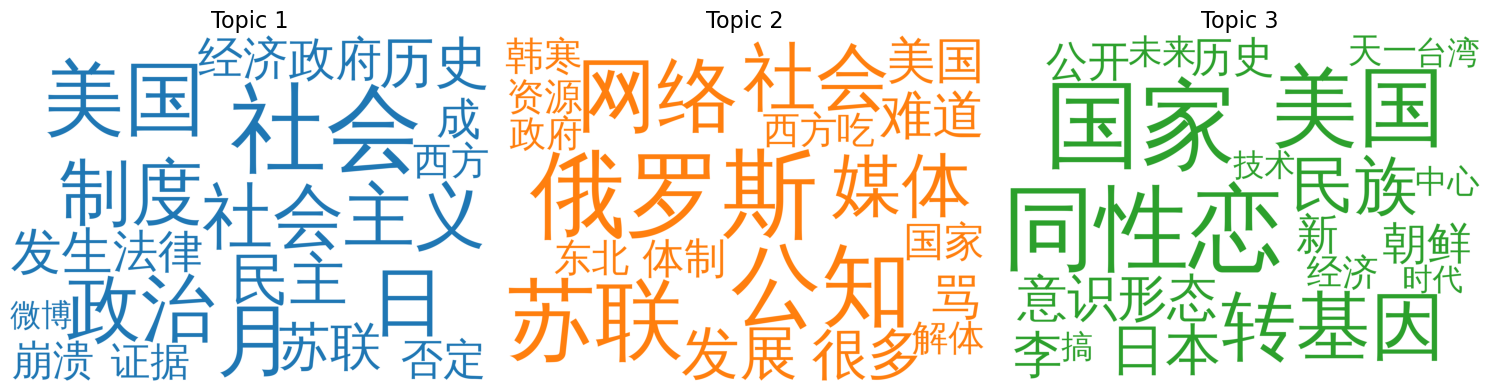


Year: 2014, Sample Cleaned Text: 0    刘汉   倒台   一群   人惊出   一身   冷汗   背后   老虎   老虎   ...
1                      很多   流汗   解决       只能   流血   交代
2                                       此事     评论   好戏
3    倒   希望   结局   序幕   希望   趁热打铁     挖大   老虎   石油 ...
4                     刘汉有   勾结   官僚   集团   人会   流   冷汗
Name: cleaned_text, dtype: object

TF-IDF Top Words:
东西, 两个, 事实, 互联网, 企业, 体制, 作家, 俄罗斯, 公开, 公知, 
公知们, 关系, 利益, 制度, 历史, 原因, 反对, 发展, 发现, 发生, 
只能, 台湾, 同性恋, 告诉, 周小平, 喜欢, 国内, 国家, 国际, 地方, 
城市, 大陆, 央视, 媒体, 孩子, 官员, 崔永元, 工作, 市场, 希望, 
当年, 很多, 微博, 思想, 情况, 成功, 战争, 技术, 改革, 政府, 
政治, 教授, 教育, 文化, 文章, 文革, 新闻, 方式, 日本, 时代, 
有人, 朋友, 朝鲜, 柴静, 毛泽东, 民主, 民众, 民族, 法律, 爱国, 
特别, 理解, 生活, 电影, 目的, 知识分子, 社会, 社会主义, 精神, 精英, 
组织, 经济, 网上, 网友, 网络, 美国, 老百姓, 自由, 舆论, 苏联, 
英雄, 西方, 证明, 质疑, 转基因, 这是, 造谣, 逻辑, 韩寒, 香港, 


[(0,
  [('转基因', 0.010238936),
   ('美国', 0.00974389),
   ('香港', 0.009098263),
   ('同性恋', 0.008541858),
   ('公知', 0.0075165164),
   ('国家', 0.0074542803),
   ('民族', 0.004392127),
   ('字', 0.004262477),
   ('想', 0.0032102948),
   ('民主', 0.0031068716)]),
 (1,
  [('国家', 0.0051057767),
   ('经济', 0.0051016873),
   ('西方', 0.004668856),
   ('英雄', 0.0037813776),
   ('发展', 0.0036397695),
   ('社会', 0.0033764662),
   ('文章', 0.0033286824),
   ('政府', 0.0032313599),
   ('美国', 0.0030541725),
   ('网络', 0.0029660512)]),
 (2,
  [('同性恋', 0.0062052957),
   ('李', 0.0053053857),
   ('社会', 0.003841619),
   ('国家', 0.0037034093),
   ('美国', 0.0036958351),
   ('这是', 0.0034148423),
   ('很多', 0.0030987426),
   ('东西', 0.0030765268),
   ('媒体', 0.0026224777),
   ('知识分子', 0.0023342266)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

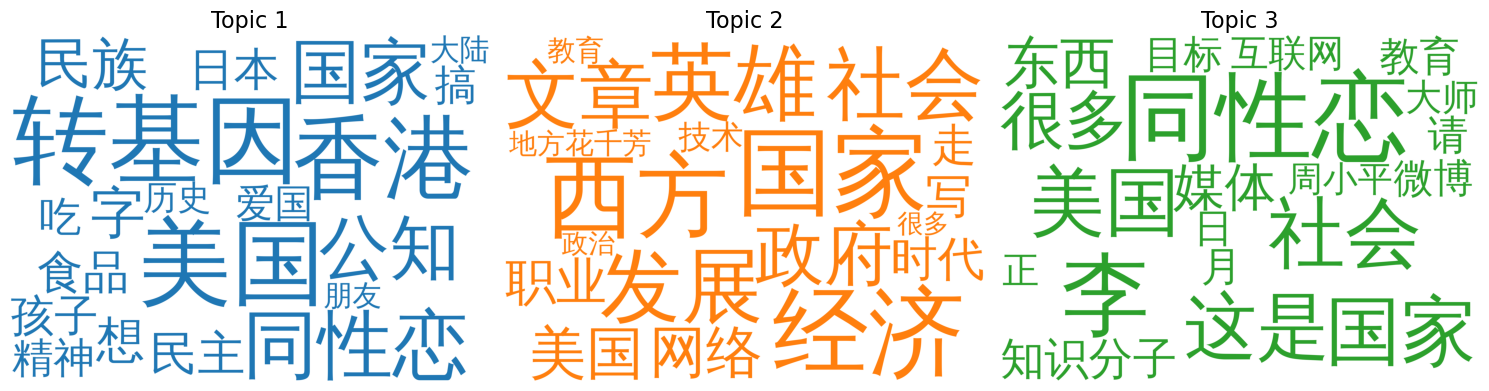


Year: 2015, Sample Cleaned Text: 0      庙堂     关注   民生   话题   特别   解决   菜价   高为   抓手...
1    庙堂   率先垂范       市场   调查     各口   管理   部门   媒体 ...
2               讨论       海南   呈现出   百家争鸣   百花齐放     局面
3    本来   一件   极大   好事   三个臭皮匠   抵   诸葛亮   集   众人  ...
4      感到   忧心   记得   利益者   吹鼓手   抓住机会   肆意   猖狂   ...
Name: cleaned_text, dtype: object

TF-IDF Top Words:
两个, 之下, 事实, 人口, 人物, 企业, 体制, 作品, 俄罗斯, 信息, 
公务员, 公知, 公知们, 共产党, 关注, 关系, 养老, 内容, 刘翔, 利益, 
制度, 历史, 原因, 反对, 发展, 发生, 只能, 否定, 国家, 国际, 
地方, 央视, 媒体, 孩子, 导致, 工作, 市场, 希望, 很多, 微信, 
微博, 思想, 情况, 情节, 意识形态, 批评, 投资, 政府, 政治, 政策, 
教授, 教育, 文人, 文化, 文章, 文革, 方式, 日本, 时代, 有人, 
未来, 权力, 柴静, 毕福剑, 毛主席, 毛泽东, 民主, 民众, 民族, 法律, 
消息, 爱国, 特别, 环境, 生活, 社会, 社会主义, 社区, 精英, 经济, 
网友, 网络, 美元, 美国, 老百姓, 自由, 舆论, 苏联, 西方, 观点, 
视频, 言论, 论坛, 资本, 资本主义, 这是, 退役, 难道, 集团, 革命, 


[(0,
  [('论坛', 0.015815923),
   ('社区', 0.0072110696),
   ('退役', 0.004769061),
   ('刘翔', 0.0035982814),
   ('公知', 0.0032274113),
   ('观点', 0.0031794596),
   ('警察', 0.0029165135),
   ('想', 0.0027626648),
   ('消息', 0.0027003083),
   ('信息', 0.0026636617)]),
 (1,
  [('美国', 0.01315541),
   ('国家', 0.010081436),
   ('社会', 0.0061978754),
   ('经济', 0.0047000227),
   ('公知', 0.004531589),
   ('民主', 0.0040542674),
   ('社会主义', 0.003908175),
   ('西方', 0.003889866),
   ('媒体', 0.003753521),
   ('发展', 0.0036606044)]),
 (2,
  [('毛泽东', 0.0036165987),
   ('历史', 0.0031251025),
   ('毕福剑', 0.0030244791),
   ('天涯', 0.0027160589),
   ('媒体', 0.002712382),
   ('霾', 0.0024335806),
   ('老兵', 0.0024269305),
   ('雾', 0.0023314608),
   ('讲', 0.002175151),
   ('阶级', 0.0021345026)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

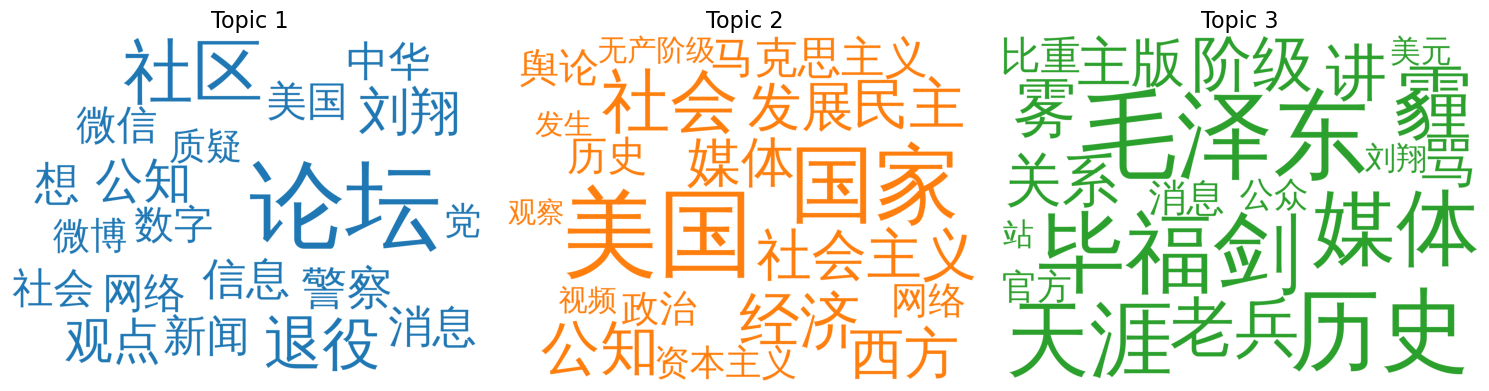


Year: 2016, Sample Cleaned Text: 0                                        别老   言论自由   事
1      传媒大学   网络   文化   建设   管理   办公室   副   主任     ...
2    日前   国家   网信   办   依法   严处   网上   违法   违规行为   ...
3                              今日   下午   更是   关闭   任志强
4    一时间   自诩   公知       网络   名人   便   迫不及待   跳   挥...
Name: cleaned_text, dtype: object

TF-IDF Top Words:
东西, 两个, 中央, 事实, 人口, 体制, 信息, 公知, 公知们, 关系, 
军事, 列宁, 利益, 制度, 力量, 历史, 原因, 反对, 发展, 发现, 
发生, 只能, 台湾, 国内, 国家, 国际, 地方, 城市, 大作, 大陆, 
媒体, 孩子, 宪政, 导致, 工作, 希望, 平台, 年代, 建立, 张千帆, 
当年, 很多, 德国, 思想, 恐慌, 情况, 意识, 意识形态, 战争, 战略, 
技术, 提到, 攻击, 政府, 政治, 文化, 文明, 文章, 斯大林, 日本, 
时代, 有人, 朝鲜, 朝鲜战争, 权力, 毛主席, 毛泽东, 民主, 民众, 民族, 
法律, 爱国, 生活, 社会, 社会主义, 精神, 精英, 组织, 经济, 统一, 
网上, 网友, 网民, 网络, 美国, 群众, 联盟, 自由, 舆论, 苏联, 
西方, 观点, 解决, 言论, 警察, 证据, 资本, 这是, 道德, 革命, 


[(0,
  [('美国', 0.013043502),
   ('社会', 0.005093375),
   ('国家', 0.004964614),
   ('苏联', 0.004339985),
   ('警察', 0.0036329287),
   ('战争', 0.0035727825),
   ('网络', 0.0031772472),
   ('提到', 0.0031303824),
   ('大作', 0.0029711209),
   ('文章', 0.002642554)]),
 (1,
  [('美国', 0.007859531),
   ('国家', 0.006185269),
   ('民主', 0.0050801714),
   ('斯大林', 0.0047543547),
   ('公知', 0.003543401),
   ('媒体', 0.0034549392),
   ('西方', 0.00286729),
   ('朴槿惠', 0.0027048467),
   ('政府', 0.0026520907),
   ('气', 0.0025840309)]),
 (2,
  [('公知', 0.007178253),
   ('国家', 0.0036357723),
   ('提到', 0.0035921617),
   ('民众', 0.0032716112),
   ('政治', 0.00299897),
   ('德国', 0.0028617787),
   ('民族', 0.0028136543),
   ('社会', 0.0027934606),
   ('希望', 0.0026296),
   ('美国', 0.002601825)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

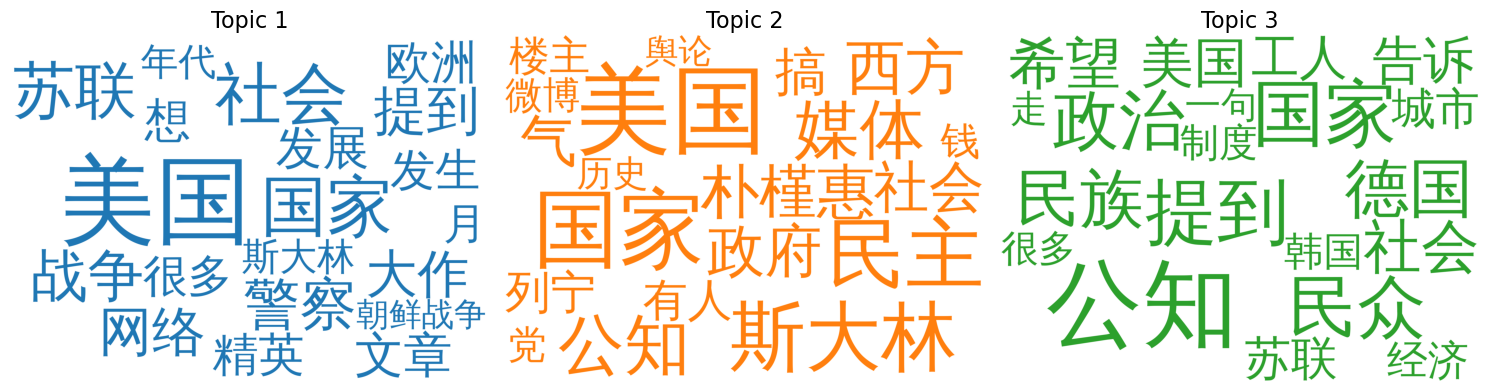


Year: 2017, Sample Cleaned Text: 0                                                   来源
1                                                乌   乡
2    公知们   抬举   此人   奉之为   偶像   赞之若   神明   粗线条   梳理...
3    胡适   民国   文人   兼   政客   解放后     批判   改革开放   名声...
4                             网   名叫   摆古论   微博中发   帖子
Name: cleaned_text, dtype: object

TF-IDF Top Words:
一丈, 两个, 主权, 事实, 互联网, 体制, 公开, 公知, 关系, 利益, 
到底, 制度, 历史, 原因, 发展, 发现, 发生, 口罩, 只能, 台湾, 
吸引, 国内, 国家, 地址, 地方, 城市, 大作, 大陆, 媒体, 孩子, 
宪政, 导致, 工作, 差辱华, 希望, 张千帆, 当年, 很多, 微博, 思想, 
情况, 战争, 执法, 批评, 技术, 抓紧, 提到, 政府, 政治, 教育, 
文化, 文明, 文章, 新鲜, 时代, 昆明, 有人, 服务, 朝鲜, 权力, 
杨舒平, 毛主席, 毛泽东, 民主, 民族, 水木, 治疗, 法律, 演讲, 爱国, 
生活, 留学生, 眼球, 社会, 社会主义, 祖国, 空气, 精神, 精英, 组织, 
经济, 网友, 网络, 美国, 胡适, 脑残, 自由, 舆论, 西方, 观点, 
视频, 解决, 言论, 警察, 讨论, 证据, 这是, 追求, 革命, 马里兰大学, 


[(0,
  [('美国', 0.024321334),
   ('留学生', 0.006482414),
   ('国家', 0.0043984936),
   ('西方', 0.0040257275),
   ('自由', 0.003753237),
   ('眼球', 0.0036296728),
   ('国内', 0.0036292071),
   ('公知', 0.003445382),
   ('吸引', 0.003389759),
   ('城市', 0.0032888022)]),
 (1,
  [('提到', 0.040036496),
   ('大作', 0.0394013),
   ('空气', 0.028577158),
   ('称', 0.021474037),
   ('杨舒平', 0.0210063),
   ('差辱华', 0.020080376),
   ('留学生', 0.014491867),
   ('视频', 0.0056993123),
   ('红', 0.0046338732),
   ('抓紧', 0.0042605908)]),
 (2,
  [('国家', 0.004369513),
   ('东', 0.0030080893),
   ('父母', 0.0026180937),
   ('口罩', 0.0026000957),
   ('社会', 0.0024786217),
   ('新', 0.0024475881),
   ('暖', 0.0022846793),
   ('想', 0.0022497568),
   ('事', 0.0021908248),
   ('企业', 0.002071279)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

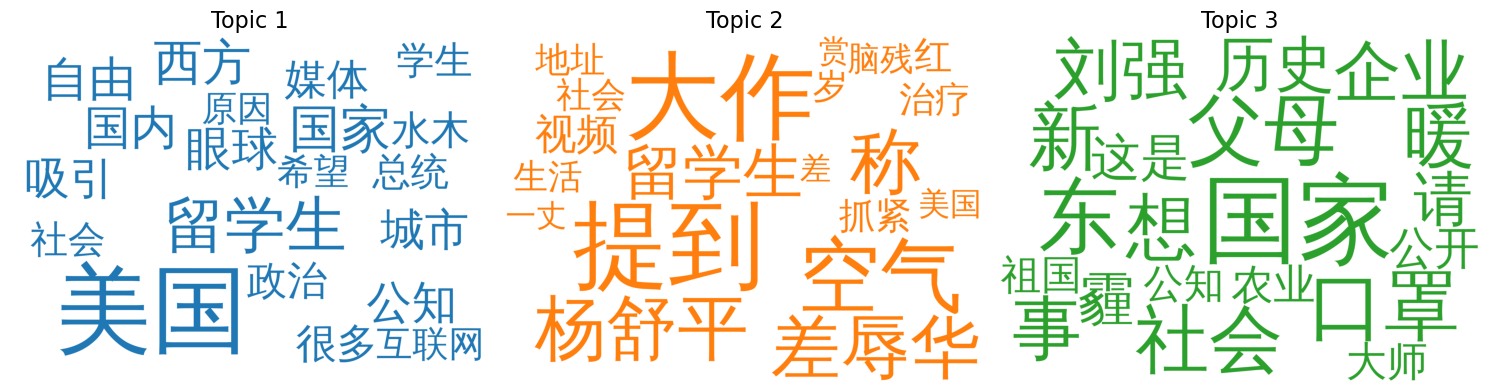


Year: 2018, Sample Cleaned Text: 0      有位   朋友   质疑   某篇国粉   文章   聊   该文   文章   讲  ...
1                                              文章   结论
2            新     小学   课本   一穷二白   描述   中华民国   抹黑   嫌
3    先且   不谈   新旧     工业   制造     距离   选   词来   较劲 ...
4      想   简单   中华民国   时代   工业   状况   粗略   摘引   希望 ...
Name: cleaned_text, dtype: object

TF-IDF Top Words:
一张, 一间, 上次, 上海, 东西, 两个, 两张, 交易, 产业, 人类, 
企业, 伊朗, 但凡, 侧身, 俄罗斯, 全世界, 全球, 公知, 关系, 利益, 
制造, 十多岁, 华为, 历史, 原因, 发展, 发现, 发生, 只能, 台湾, 
吃饭, 各背, 国内, 国家, 国际, 地方, 城堡, 城市, 大作, 大半年, 
大提琴, 大陆, 媒体, 孩子, 对面, 小事, 小女生, 崔永元, 市场, 很多, 
情况, 想起, 感觉, 成年人, 战争, 技术, 拼桌, 提到, 放在, 政府, 
政治, 政策, 教堂, 文化, 日本, 时代, 普通话, 有人, 未来, 桌子, 
桌边, 欧洲, 民众, 汉奸, 汽车, 法律, 深圳, 港籍, 特别, 特朗普, 
玩儿, 生意, 生活, 社会, 租界, 空位, 第二天, 精致, 组织, 经济, 
美元, 美国, 群体, 茶餐厅, 贴子, 这是, 迪士尼, 逛街, 韩寒, 香港, 


[(0,
  [('美国', 0.017106833),
   ('月', 0.0056257118),
   ('崔永元', 0.0055572027),
   ('美元', 0.005229687),
   ('国家', 0.0051111323),
   ('日', 0.0043281275),
   ('特朗普', 0.003374523),
   ('日本', 0.0032900458),
   ('亿美元', 0.0032734163),
   ('两个', 0.0029685155)]),
 (1,
  [('提到', 0.006303315),
   ('大作', 0.0046330146),
   ('发展', 0.004146583),
   ('教堂', 0.004041832),
   ('很多', 0.0036939348),
   ('公知', 0.0032438536),
   ('历史', 0.003199556),
   ('利益', 0.0029332228),
   ('警察', 0.0027581453),
   ('国家', 0.0027112376)]),
 (2,
  [('美国', 0.016150223),
   ('台湾', 0.010514086),
   ('香港', 0.010261252),
   ('发生', 0.0071264096),
   ('崔永元', 0.006379966),
   ('想起', 0.0060304734),
   ('大陆', 0.0055429526),
   ('城堡', 0.0042748377),
   ('想', 0.0042044544),
   ('大作', 0.004192844)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

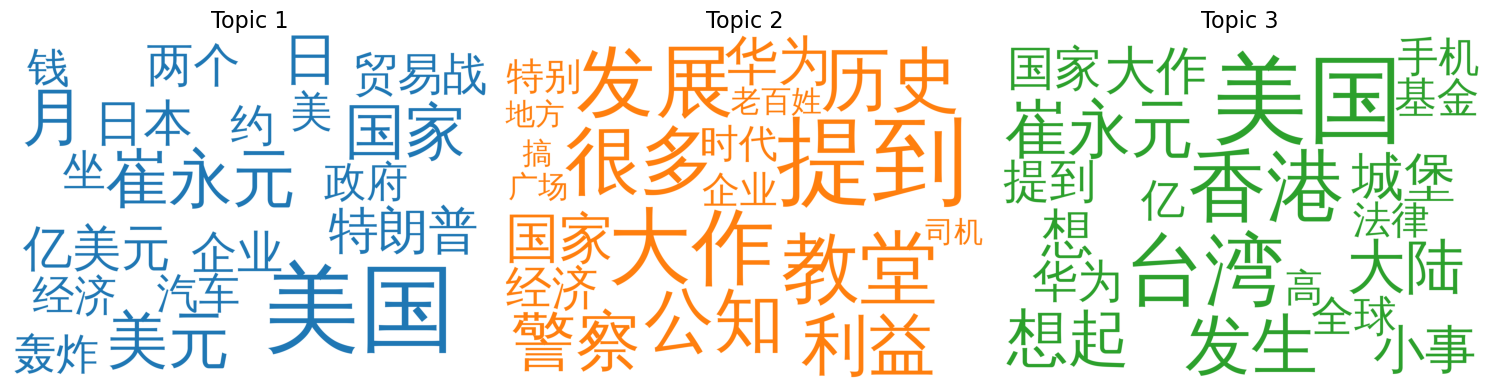


Year: 2019, Sample Cleaned Text: 0    变道   撞   韩寒   这波   言论   水平               虎   扑...
1    公知       韩寒   回复   网友   发出     言论           这波...
2    表达   个人观点   视频   车     故意   加速     确实   恶劣    ...
3                         经验       生活   中有   很多     情况
4                快到   路口   变道       转向灯   车   加速   信号灯
Name: cleaned_text, dtype: object

TF-IDF Top Words:
东西, 两个, 主席, 企业, 作家, 俄罗斯, 保险, 保险公司, 健保, 全球, 
公知, 几个, 利益, 制度, 剖腹产, 医保, 医生, 医疗, 医院, 华为, 
协议, 印度, 历史, 原因, 发展, 发现, 发生, 只能, 台湾, 国内, 
国家, 国际, 地区, 大作, 大陆, 妇女, 媒体, 孩子, 工业, 工作, 
市场, 希望, 建立, 开放, 当年, 很多, 微博, 总统, 情况, 成功, 
战争, 战略, 技术, 投资, 抗战, 提到, 政府, 政治, 教育, 文化, 
文明, 日本, 时代, 时期, 暴徒, 更是, 有人, 欧洲, 母乳, 母乳喂养, 
毛泽东, 民主, 民主党, 民众, 民族, 治安, 特朗普, 生产, 生活, 百度, 
社会, 组织, 经济, 网络, 罗永浩, 美元, 美国, 胡适, 舆论, 英国, 
西方, 警察, 账单, 货币, 贴个, 资源, 越南, 这是, 革命, 香港, 


[(0,
  [('台湾', 0.004245324),
   ('美国', 0.0034341142),
   ('医保', 0.003362116),
   ('欧洲', 0.0032819777),
   ('国家', 0.003030441),
   ('时期', 0.0029217112),
   ('媒体', 0.0028886078),
   ('德国', 0.0027222848),
   ('特朗普', 0.0025899408),
   ('月', 0.0025512285)]),
 (1,
  [('美国', 0.009502944),
   ('特朗普', 0.006856181),
   ('国家', 0.0057841633),
   ('吃', 0.0056608906),
   ('香港', 0.004720205),
   ('英国', 0.0038223218),
   ('警察', 0.0037571301),
   ('台湾', 0.0032415574),
   ('调查', 0.0031393906),
   ('西方', 0.003053246)]),
 (2,
  [('美国', 0.019882428),
   ('罗永浩', 0.008165741),
   ('提到', 0.006335901),
   ('医院', 0.00628947),
   ('医疗', 0.0056992737),
   ('大作', 0.0055541396),
   ('报销', 0.0035649824),
   ('特朗普', 0.0035549419),
   ('食', 0.0035089573),
   ('账单', 0.0033230467)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

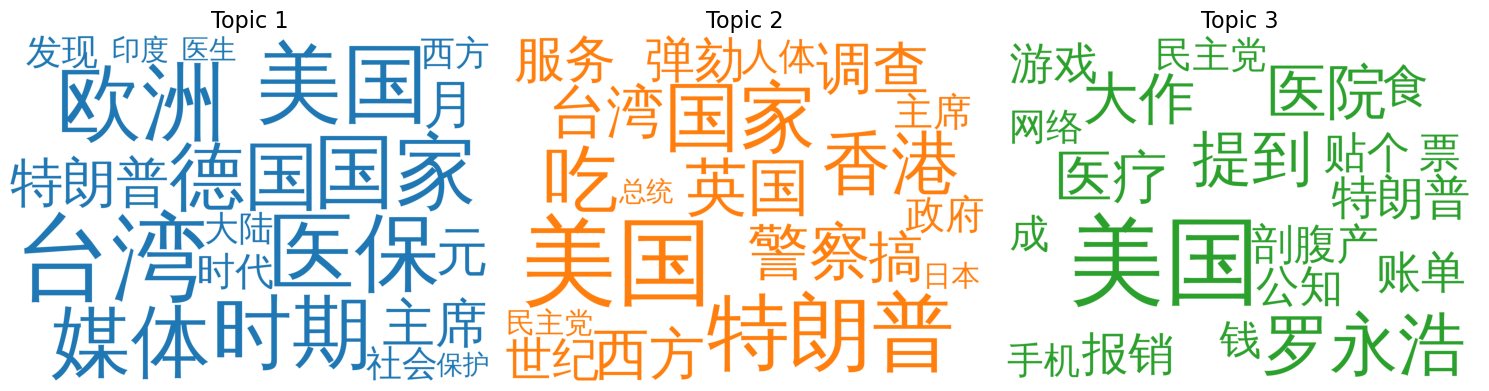


Year: 2020, Sample Cleaned Text: 0                    自恨族   领了   报酬   欧美   台湾   敌特   分子
1    肆意   诋毁   中华民族   历史   文化   攻击   党和政府   攻击   政策...
2    有没有   悲哀   发现     地方   避   唯恐   不及   版   版    ...
3                                                     
4    白宫     集会   引渡   孟晚 舟   公知   教授   民运   分子   此君...
Name: cleaned_text, dtype: object

TF-IDF Top Words:
一年, 上甘岭, 不到, 东西, 两个, 买房, 事实, 二代, 今日, 企业, 
儿子, 公知, 关键, 农村, 农民, 判决, 判决书, 加班, 医疗, 历史, 
发展, 发现, 发自, 台湾, 同学, 同意, 员工, 国内, 国家, 安排, 
家庭, 富裕, 川比, 工作, 工资, 常学红, 年代, 年轻人, 强大, 当年, 
很多, 情况, 战场, 承担, 拒绝, 损失, 接受, 提供, 政府, 文化, 
新冠, 日本, 有人, 朝鲜, 本案, 来源, 毕业, 民主, 民众, 水木, 
法官, 法律, 父母, 特朗普, 现场, 理由, 理解, 生产, 生出, 生活, 
疫情, 目瞪狗, 石纪, 硬刚, 确实, 社会, 社区, 紧迫, 经济, 美元, 
美国, 美帝, 群发, 肯定, 自由, 至少, 英国, 西方, 视频, 证明, 
赔偿, 起步, 超过, 身处, 这是, 那种, 金刚, 院校, 集体主义, 首付, 


[(0,
  [('理解', 0.020634422),
   ('金刚', 0.01159965),
   ('上甘岭', 0.010668769),
   ('集体主义', 0.008482848),
   ('川比', 0.0071967053),
   ('英国', 0.005376739),
   ('民主', 0.004986179),
   ('大片', 0.004663243),
   ('公知', 0.004156668),
   ('美国', 0.0040491913)]),
 (1,
  [('朝鲜', 0.016444014),
   ('水木', 0.010884748),
   ('判决书', 0.008426239),
   ('呆', 0.0075019132),
   ('目瞪狗', 0.0072391545),
   ('硬刚', 0.005532809),
   ('社区', 0.0051734853),
   ('利益', 0.00493954),
   ('站', 0.004482162),
   ('战争', 0.003597424)]),
 (2,
  [('美国', 0.035787545),
   ('接受', 0.01353217),
   ('当年', 0.010526005),
   ('美帝', 0.009991938),
   ('现场', 0.009056465),
   ('年轻人', 0.008622934),
   ('上甘岭', 0.007615819),
   ('金刚', 0.0060709356),
   ('硬刚', 0.005467547),
   ('疫情', 0.0049957116)])]

<Axes: >

Text(0.5, 1.0, 'Topic 1')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 2')

(-0.5, 2499.5, 1799.5, -0.5)

<Axes: >

Text(0.5, 1.0, 'Topic 3')

(-0.5, 2499.5, 1799.5, -0.5)

(-0.5, 2499.5, 1799.5, -0.5)

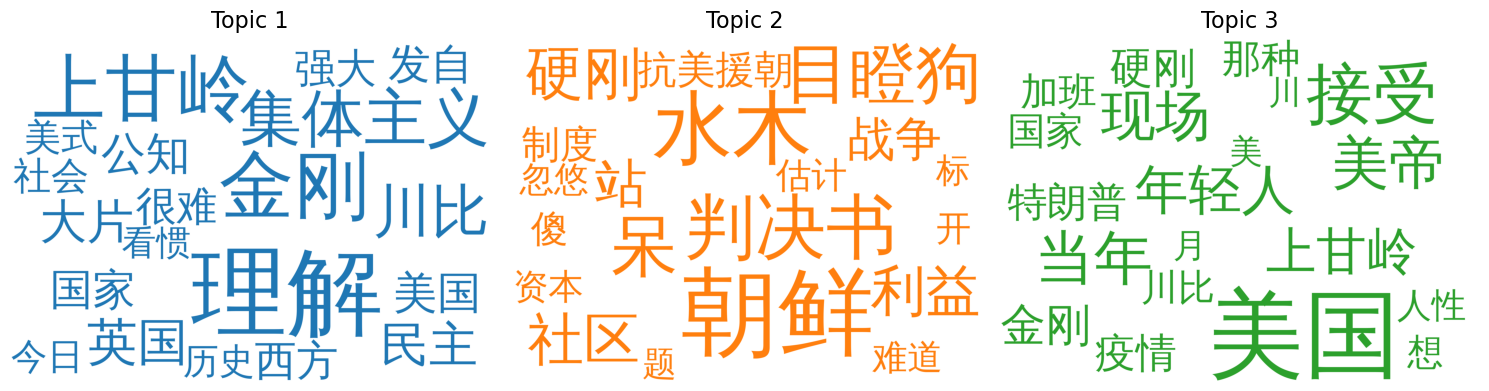

In [79]:
file_pattern = '/home/torres/codes/statistics/hw5/commentsData/{}_qc.xlsx'
years = range(2011, 2021)
stopwords_path = 'chineseStopWords.txt'
stopwords = load_stopwords(stopwords_path)

for year in years:
    file_path = file_pattern.format(year)
    df = pd.read_excel(file_path, header=None, usecols=[0])
    df = df.dropna().astype(str)
    
    df['cleaned_text'] = df[0].apply(clean_text).apply(lambda x: segment_and_remove_stopwords(x, stopwords))
    
    # 打印清洗后的部分文本
    print(f"\nYear: {year}, Sample Cleaned Text: {df['cleaned_text'].head()}")

    # 应用TF-IDF
    tfidf_matrix, feature_names = tfidf_transform(df['cleaned_text'],stopwords)
    
    # 打印TF-IDF的关键词
    print("\nTF-IDF Top Words:")
    for i, feature in enumerate(feature_names):
        print(f"{feature}", end=", ")
        if (i + 1) % 10 == 0:
            print()

    texts_split = [text.split() for text in df['cleaned_text']]
    dictionary, corpus = create_corpus(texts_split)

    lda = lda_model(corpus, dictionary, num_topics=3)

    # 生成词云图的颜色
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    lda.show_topics(formatted=False, num_topics=3,num_words=10)
    topics = lda.show_topics(formatted=False, num_words=20)
    cloud = WordCloud(stopwords=stopwords,
                        background_color='white',
                        width=2500,
                        height=1800,
                        max_words=20,
                        colormap='tab10',
                        color_func=lambda *args, **kwargs: cols[i % len(cols)],
                        font_path='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc',
                        prefer_horizontal=1.0)

    fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        if i == 5:
            ax.axis('off')
            break
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=500)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
        plt.gca().axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()